In [ ]:
# sklearn tutorial for mhealth23

# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:
# standard imports
import numpy as np
import pandas as pd

# we'll be using the wine dataset as a toy example: https://archive.ics.uci.edu/ml/datasets/wine
from sklearn.datasets import load_wine

# we'll evaluate a decision tree, a random forest, a suport vector machine and a k-nearest neighbour classifier
from sklearn.tree import DecisionTreeClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import plot_tree # to visualize the decision tree
from sklearn.neighbors import KNeighborsClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.svm import SVC # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# to create a test and train split
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# for plotting (you should only need to run the next two lines once)
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
# !pip install install nodejs
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
#  loading and prepping dataset
wine = load_wine()

# some information about the wine
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])

# who cultivated the wine?
y = pd.DataFrame(wine['target'], columns = ['label'])

print('#' * 60, end = '\n\n')
print(X.describe())
print('#' * 60, end = '\n\n')
print(X.head())
print('#' * 60, end = '\n\n')
print(y.head())

############################################################

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.99

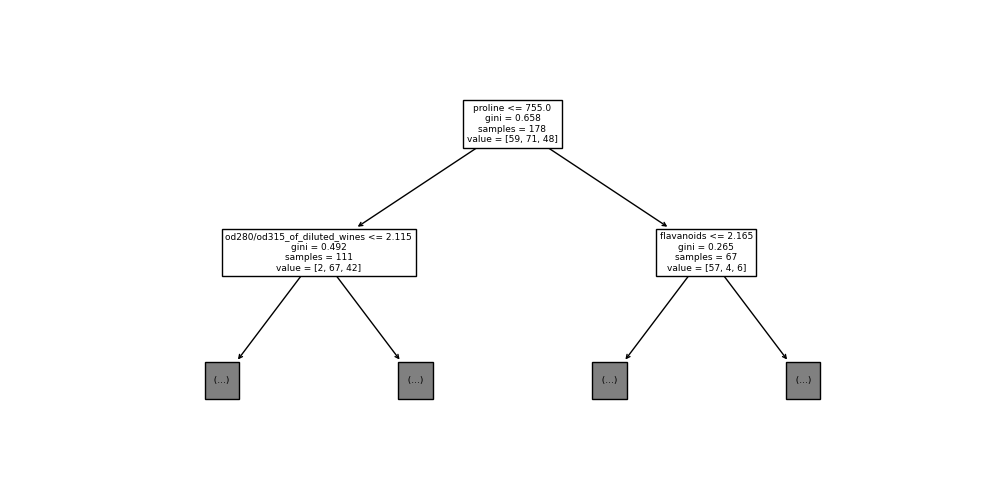

In [4]:
# DT: quick fit with default parameters
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

# visualizing the decision tree
plt.figure(figsize=(10,5))
plot_tree(clf, feature_names = X.columns, max_depth = 1)
plt.show()

In [5]:
# prediction
y_preds = clf.predict(X)
print(y_preds)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 2 1 2 1 1 0
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
# performance assessment
print(accuracy_score(y, y_preds))
print()
print(confusion_matrix(y, y_preds))

0.9213483146067416

[[57  2  0]
 [ 2 61  8]
 [ 0  2 46]]


In [7]:
for md in range(1,10):
    clf = DecisionTreeClassifier(max_depth = md)
    clf.fit(X,y)
    y_preds = clf.predict(X)
    print("{}: {}".format(md, np.round(accuracy_score(y, y_preds), 2)))

1: 0.7
2: 0.92
3: 0.98
4: 0.99
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 1.0


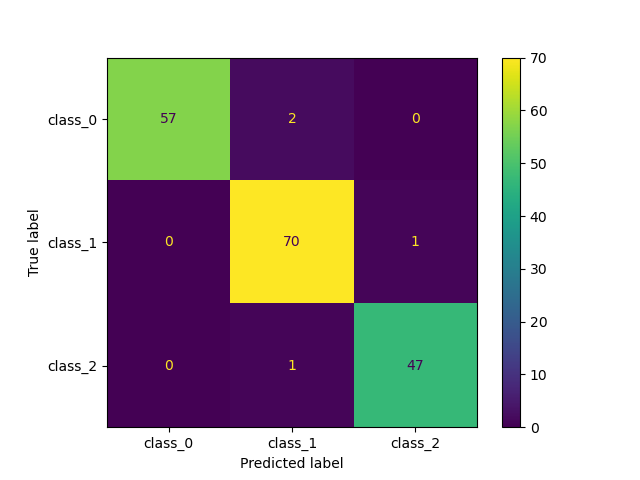

In [11]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)
y_preds = clf.predict(X)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y, y_preds), display_labels = wine['target_names']).plot()
plt.show()

In [ ]:
print('precision: {}'.format(np.round(precision_score(y, y_preds,average = 'weighted'), 3)))
print(np.round(precision_score(y, y_preds,average = None),3), end = '\n\n') # tp / (tp + fp)

print('recall {}'.format(np.round(recall_score(y, y_preds,average = 'weighted'), 3)))
print(np.round(recall_score(y, y_preds,average = None),3), end = '\n\n') # tp / (tp + fn)

print('f1 {}'.format(np.round(f1_score(y, y_preds,average = 'weighted'), 3)))
print(np.round(f1_score(y, y_preds,average = None),3), end = '\n\n') # 2 * (precision * recall) / (precision + recall)

In [9]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [12]:
# Generalization error
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("train accuracy:")
train_preds = clf.predict(X_train)
print(confusion_matrix(y_train, train_preds))
print(accuracy_score(y_train, train_preds))

print()
print('#' * 20)
print("test accuracy:")

test_preds = clf.predict(X_test)
print(confusion_matrix(y_test, test_preds))
print(accuracy_score(y_test, test_preds))

train accuracy:
[[50  0  0]
 [ 0 57  0]
 [ 0  0 35]]
1.0

####################
test accuracy:
[[ 9  0  0]
 [ 0 12  2]
 [ 0  1 12]]
0.9166666666666666


In [13]:
# cross validation: DT
# common parameter(s) to tune: max_depth
accs = list()
for md in np.arange(10)+1:
    accs = list()
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

        clf = DecisionTreeClassifier(max_depth = md)
        clf.fit(X_train, y_train)

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(md, np.round(np.mean(accs), 2)))

1:	0.64
2:	0.86
3:	0.91
4:	0.91
5:	0.91
6:	0.91
7:	0.92
8:	0.91
9:	0.9
10:	0.91


In [14]:
# cross validation: RF
# common parameter(s) to tune: max_depth and n_estimators
accs = list()
for md in np.arange(5)+1:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

        clf = RandomForestClassifier(max_depth = md, n_estimators = 100)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(md, np.round(np.mean(accs), 2)))

1:	0.91
2:	0.96
3:	0.99
4:	0.96
5:	0.98


In [16]:
# cross validation: KNN
# common parameter(s) to tune: n_neighbors
accs = list()
for nb in np.arange(3, 20)+1:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

        clf = KNeighborsClassifier(n_neighbors = nb)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(nb, np.round(np.mean(accs), 2)))

4:	0.66
5:	0.73
6:	0.68
7:	0.71
8:	0.72
9:	0.7
10:	0.7
11:	0.68
12:	0.67
13:	0.74
14:	0.68
15:	0.71
16:	0.68
17:	0.71
18:	0.72
19:	0.7
20:	0.69


In [15]:
# cross validation: SVM
# common parameter(s) to tune: kernel and C
accs = list()
for c in np.arange(1, 11)/10:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

        clf = SVC(kernel = 'linear', C = c)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(c, np.round(np.mean(accs), 2)))

0.1:	0.95
0.2:	0.94
0.3:	0.95
0.4:	0.95
0.5:	0.95
0.6:	0.95
0.7:	0.96
0.8:	0.97
0.9:	0.95
1.0:	0.94
